In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
print("Package Loaded")

Package Loaded


### data1.txt is from Chapter 2 of Ng's Machine learning class ###

In [2]:
xy = np.loadtxt("data1.txt", delimiter=',', unpack=True, dtype='float64')
train_X = xy[0:-1]
train_Y = xy[-1]

n_samples = train_X[0].size

print ""
print "Type of 'train_X' is %s" % type(train_X)
print "Shape of 'train_X' is", train_X.shape
print ("Type of 'train_Y' is ", type(train_Y))
print ("Shape of 'train_Y' is", train_Y.shape)
print ("n_samples' is", n_samples)


Type of 'train_X' is <type 'numpy.ndarray'>
Shape of 'train_X' is (2, 100)
("Type of 'train_Y' is ", <type 'numpy.ndarray'>)
("Shape of 'train_Y' is", (100,))
("n_samples' is", 100)


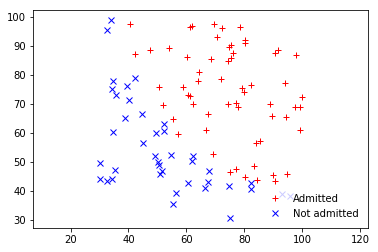

In [3]:
pos = train_Y == 1
neg = train_Y == 0

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.axis('equal')
plt.legend(loc='lower right')

### Cost Function(minimize negative log-likelihood) ###
$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m} [y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]
$$

### Vectorized Form ###
$$
J(\theta) = -\frac{1}{m}((\log(g(X\theta)))^TY + (\log(1-g(X\theta)))^T(1-Y))
$$

### Gradient ###
$$
\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{n}\sum^n_{i=1}(h_\theta (x_i) - y_i)x_{ij}
$$

### Vectorized Form ###
$$
\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{n}X^T(g(\theta X)-Y)
$$

In [4]:
temp_X = np.insert(train_X, 0, 1, axis=0)
temp_Y = train_Y
W = np.random.random((1, 3))

def h(X, w):
    return np.dot(w, X)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hypothesis(X, w):
    return sigmoid(h(X, w))

def costF(X, Y, w):
    return -(np.dot(np.log(hypothesis(X, w)), Y.T) + np.dot(np.log(1 - hypothesis(X, w)), (1 - Y).T)) / n_samples
    
def gradientDescent(X, Y, w, alpha, num_iters):
    for i in xrange(num_iters):
        w -= (np.dot(X, (hypothesis(X, w) - Y).T) / n_samples).T * alpha / n_samples
        if i % 10000 == 0:
            print i, w, costF(X, Y, w)
    return w

finalW = gradientDescent(temp_X, temp_Y, W, 0.015, 200001)

0 [[ 0.24335417  0.88949528  0.26987361]] [ nan]
10000 [[ 0.12801745  0.00953835 -0.00054272]] [ 0.63882671]
20000 [[ 0.02230456  0.01027063  0.00027818]] [ 0.63137566]
30000 [[-0.0820507   0.01099476  0.00108924]] [ 0.62411476]
40000 [[-0.18506464  0.01171082  0.00189052]] [ 0.61703932]
50000 [[-0.286754    0.01241891  0.0026821 ]] [ 0.61014466]
60000 [[-0.38713596  0.0131191   0.00346408]] [ 0.60342614]
70000 [[-0.48622805  0.01381149  0.00423654]] [ 0.59687918]
80000 [[-0.58404809  0.01449617  0.00499959]] [ 0.59049922]
90000 [[-0.68061417  0.01517323  0.00575331]] [ 0.58428178]
100000 [[-0.77594461  0.01584277  0.00649782]] [ 0.57822244]
110000 [[-0.87005788  0.01650489  0.00723322]] [ 0.57231683]
120000 [[-0.96297258  0.01715968  0.00795962]] [ 0.56656069]
130000 [[-1.05470741  0.01780724  0.00867714]] [ 0.56094981]
140000 [[-1.14528113  0.01844767  0.00938589]] [ 0.55548007]
150000 [[-1.2347125   0.01908108  0.01008599]] [ 0.55014743]
160000 [[-1.32302027  0.01970755  0.01077757]

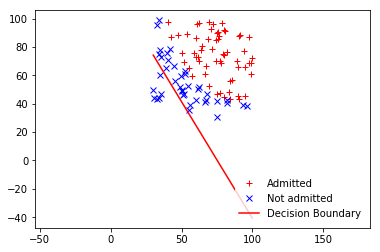

In [5]:
x = np.array([np.min(temp_X[1,:]), np.max(temp_X[1,:])])
y = (-1./W[0,2])*(W[0,0] + W[0,1]*x)

plt.figure(1)
plt.plot(train_X[0][pos], train_X[1][pos], 'r+', label='Admitted')
plt.plot(train_X[0][neg], train_X[1][neg], 'bx', label='Not admitted')
plt.plot(x, y, 'r-', label='Decision Boundary')
plt.axis('equal')
plt.legend(loc='lower right')